# DS 3000 Lab 1

Due: Thursday, Sept. 16 @ 11:59 pm

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Collaborate: bounce ideas off of each other, if you are having trouble you can ask your classmates or Dr. Singhal for help with specific issues, however...
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), i.e. you are welcome to **talk about** (*not* show each other your answers to) the problems.

In [45]:
# you may want to use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup

# Part 1: Sketch and Begin Implementing a Pipeline

We wish to create a data frame that includes all the spells for each class (a "class" is something like a "wizard", or a "bard") in Dungeons and Dragons 5th Edition, which you can find [here](http://dnd5e.wikidot.com/). Your final data frame should look something like:

| Class     | Level     | Spell Name    | School      | Casting Time | Range                | Duration      | Components |
|----------:|----------:|--------------:|------------:|-------------:|---------------------:|--------------:|-----------:|
| Artificer | Cantrip   | Acid Splash   | Conjuration | 1 Action     | 60 Feet              | Instantaneous | V, S       |
| Artificer | Cantrip   | Booming Blade | Evocation   | 1 Action     | Self (5-foot radius) | 1 Round       | S, M       |
| ...       | ...       | ...           | ...         | ...          | ...                  | ...           | ...        |
| Wizard    | 9th Level | Wish          | Conjuration | 1 Action     | Self                 | Instantaneous | V          |

## Part 1.1: Poking Around (10 points)

Go to the D&D 5th Edition linked above. Scroll down to the "All Spells" list and click on "Artificer Spells", spend a moment looking around at the page, then "Bard Spells" to do the same, and make note of the url of each. What do you note about the pages and url that should be pretty convenient for scraping the data we are interested in for all different types of spells? Discuss anything else you might notice about the pages that may be either tricky or convenient to deal with. Note that in our desired data frame, we include the "Class" and "Level" for each spell.

The url takes the format spells:[spell name] which means we can create an array of spells and then send a get request to each spell in the array with format `http://dnd5e.wikidot.com/spells:[spell name]`. The page has a nice table format that can be easily used for scraping. There are multiple tabs in the table which could make it harder to scrape. 

## Part 1.2: Sketch the Pipeline (20 points)

First, in a markdown cell, write a bullet point list of tasks we need to get the data frame we want. I'll give you what the first bullet point should be, and you fill in the rest (there may be only one more, depending on how efficient you are in describing the tasks...):

- Write a function that takes a class (string) as an argument and returns the tables from the class's DND wiki spell page in a dictionary for each spell level
- ... 

Then, in a code cell, define **empty** functions that correspond to the tasks you identified as needing done. For example, the function for the first bullet point above might start with:

```python
def get_class_spell_dict(dnd_class):
    """ takes a D&D class (string) and gets the spell tables and saves them in a dictionary
    
    Args:
        dnd_class (str): the D&D class
        
    Returns:
        table_dict (dict): a dictionary of tables, one for each spell level
    """
    pass
```

- Write a funciton that takes in a table and returns a cleaned dataframe with the class and level added as columns
- Write a function that takes in a list of dataframes and concatenates them into one big dataframe
- Write a function taht orchestrates the whole process, taking in a list of classes and returning the final dataframe

In [46]:
def add_class_and_level_columns(spell_table, dnd_class, spell_level):
    """Adds Class and Level columns to a spell table DataFrame
    
    Args:
        spell_table (DataFrame): the spell table for a specific level
        dnd_class (str): the D&D class name
        spell_level (str): the spell level (e.g., 'Cantrip', '1st Level')
        
    Returns:
        DataFrame: the spell table with added Class and Level columns
    """
    pass

def combine_all_class_tables(all_class_dicts):
    """Combines all spell tables from all classes into a single DataFrame
    
    Args:
        all_class_dicts (dict): dictionary where keys are class names and 
                                values are dictionaries of spell tables by level
        
    Returns:
        DataFrame: combined DataFrame with all spells from all classes
    """
    pass

def scrape_all_dnd_spells():
    """Main function that orchestrates the entire scraping pipeline
    
    Returns:
        DataFrame: final DataFrame containing all D&D 5e spells with columns:
                  Class, Level, Spell Name, School, Casting Time, Range, Duration, Components
    """
    pass

## Part 1.3: Write the first function (30 points)

Go ahead and write the first function, and then test it by getting the dictionary of Druid spell tables. Show that it works by printing out the head of the 4th level Druid spells. Your final calls should be something like:

```python
druid_spell_tables = get_class_spell_dict("druid")
druid_spell_tables['Level 4'].head()
```

**Note**: depending on how you create the dictionary in your `get_class_spell_dict` function, you may not have `'Level 4'` as the key; that's fine. The top of the table should look like:

| Spell Name       | School        | Casting Time | Range                | Duration      | Components |
|-----------------:|--------------:|-------------:|---------------------:|--------------:|-----------:|
| Blight              | Necromancy    | 1 Action     | 30 Feet              | Instantaneous       | V, S   |
| Charm Monster	 | Enchantment   | 1 Action    | 30 Feet              | 1 hour      | V, S

In [47]:
def get_class_spell_dict(dnd_class):
    """
    Takes a D&D class (string) and gets the spell tables and saves them in a dictionary
    
    Args:
        dnd_class (str): the D&D class
        
    Returns:
        table_dict (dict): a dictionary of tables, one for each spell level
    """

    # Get    
    url = f'http://dnd5e.wikidot.com/spells:{dnd_class.lower()}'
    response = requests.get(url)
    
    if response.status_code != 200:
        raise Exception(f"Failed to load page {url}")

    # Parse
    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all('table', class_='wiki-content-table')
    
    level_names = ['Cantrip', '1st Level', '2nd Level', '3rd Level', '4th Level', 
                   '5th Level', '6th Level', '7th Level', '8th Level', '9th Level']
    
    tables_dict = {}
    for i, table in enumerate(tables):
        if i < len(level_names):
            tables_dict[level_names[i]] = pd.read_html(str(table))[0]
    
    return tables_dict

druid_spell_tables = get_class_spell_dict("bard")
druid_spell_tables['4th Level'].head()

,Spell Name,School,Casting Time,Range,Duration,Components
0,Charm Monster,Enchantment,1 Action,30 feet,1 hour,"V, S"
1,Compulsion,Enchantment,1 Action,30 feet,"Concentration, up to 1 minute","V, S"
2,Confusion,Enchantment,1 Action,90 feet,"Concentration, up to 1 minute","V, S, M"
3,Dimension Door,Conjuration,1 Action,500 feet,Instantaneous,V
4,Ego Whip (UA),Enchantment,1 Action,30 feet,"Concentration, up to 1 minute",V


# Part 2: Web Scraping EuroMillions Results

For this problem, we will begin to create a small data set scraped from [Euro-Millions](https://www.euro-millions.com/) which is a lottery that is played across nine European countries. Draws take place on Tuesday and Friday evenings with a minimum guaranteed jackpot of â‚¬17 million. 

## Part 2.1: The Scraper Function (20 points)

Complete the function `get_lottery_html()` below (including docstring) which visits the lottery results for a specific date and grabs the html. Visit [the website](https://www.euro-millions.com/results/) to select a date or two and notice the pattern in the url so that you can pass any date to the function as a string. 

**Make sure to remove the `pass` statement when you are finished**. I have written the code you should run once the function is completed, getting the lottery results from the last day in April.

In [48]:
def get_lottery_html(code):
    """
    Takes a EuroMillions country code (string) and returns the HTML of the results page
    
    Args:
        code (str): the EuroMillions country code (e.g., 'uk', 'fr', 'es')
    
    Returns:
        soup (BeautifulSoup): the parsed HTML of the results page"""

    # Get
    url = f"https://www.euro-millions.com/results/{code}"
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Failed to load page {url}")

    return response.text

'\r\n<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n\r\n\t<title>EuroMillions Results for Tuesday 6th May 2025 - Draw 1839</title>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n\t<meta name="description" content="View the EuroMillions results including prize breakdown, HotPicks numbers and Millionaire Maker codes for Tuesday 6th May 2025.">\r\n\t<meta name="keywords" content="euromillions results 06-05-2025, 6th may 2025, draw number 1839">\r\n\t<meta name="author" content="Euro-Millions.com">\r\n\t<meta name="format-detection" content="telephone=no">\r\n\t<meta name="HandheldFriendly" content="True">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\r\n\t\r\n\t<link rel="alternate" hreflang="x-default" href="https://www.euro-millions.com/results/06-05-2025">\r\n<link rel="alternate" hreflang="fr" href="https://www.euro-millions.com/fr/resultats/06-05-2025">\r\n<link rel="alternate" hreflang="de-AT" href="https://www.euro-millions
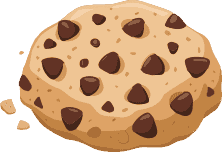

In [49]:
# when you are done the following code should be run
url_text = get_lottery_html('06-05-2025')
url_text 

## Part 2.2: The Soup Function (20 points)

Complete the function `get_country_soup()` below (including docstring) which takes the html from the previous function and outputs one of nine beautiful soup objects, depending on the country you are interested in as defined by the `'id'` attribute:

    - `id='PrizeAT'` (Austria)
    - `id='PrizeBE'` (Belgium)
    - `id='PrizeFR'` (France)
    - `id='PrizeIE'` (Ireland)
    - `id='PrizeLU'` (Luxembourg)
    - `id='PrizePT'` (Portugal)
    - `id='PrizeES'` (Spain)
    - `id='PrizeCH'` (Switzerland)
    - `id='PrizeGB'` (UK)
    
The function should take two arguments: the html object from `get_lottery_html()` and a string that specifies the `id` you are interested in (by default, Belgium or `BE`).
    
**Make sure to remove the `pass` statement when you are finished.** Then, also make sure to run the code to ensure your function works.

In [50]:
def get_country_soup(html, country='BE'):
    """Extracts the BeautifulSoup object for a specific country's lottery results
    
    Args:
        html (str): HTML content from get_lottery_html()
        country (str): Country code (default 'BE' for Belgium)
                      Options: 'AT', 'BE', 'FR', 'IE', 'LU', 'PT', 'ES', 'CH', 'GB'
        
    Returns:
        BeautifulSoup object: Parsed HTML section for the specified country's prizes
    """

    soup = BeautifulSoup(html, 'html.parser')
    country_section = soup.find(id=f'Prize{country}')
    return country_section

In [51]:
# when you are done the following code should be run (feel free to change the country if you wish)
country_choice = 'FR'
my_country_soup = get_country_soup(url_text, country_choice)
my_country_soup #uncomment to see if it worked

<div id="PrizeFR">
<table class="mobFormat">
<thead>
<tr>
<th>Numbers Matched</th>
<th class="righty">Prize Per Winner</th>
<th class="righty">French Winners</th>
<th class="righty">Prize Fund Amount</th>
<th class="righty">Total Winners</th>
</tr>
</thead>
<tbody>
<tr>
<td class="colour" data-title="Numbers Matched">
<span class="prizeName"><span class="ball">5 </span> + <span class="star"> 2</span></span>
</td>
<td class="righty" data-title="Prize Per Winner">
											€108,197,286.10
											
										</td>
<td class="righty" data-title="French Winners">
												0
												
											</td>
<td class="righty" data-title="Prize Fund Amount">
												€0.00
												
											</td>
<td class="righty" data-title="Total Winners">
<strong style="color:#F00">Rollover!</strong> 
												0
												
										</td>
</tr>
<tr>
<td class="colour" data-title="Numbers Matched">
<span class="prizeName"><span class="ball">5 </span> + <span class="star"> 1</span></span>